In [1]:
import pandas as pd
from matplotlib import pyplot as plt

**CLEANING DATA**

In [2]:
df=pd.read_csv('house-prices.csv')
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [33]:
df=df.dropna()
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,0,0
1,2,114200,2030,4,2,3,0,0
2,3,114800,1740,3,2,1,0,0
3,4,94700,1980,3,2,3,0,0
4,5,119800,2130,3,3,3,0,0
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,1,0
124,125,147900,2160,4,3,3,1,0
125,126,113500,2070,2,2,2,0,1
126,127,149900,2020,3,3,1,0,2


In [34]:
df=df.drop_duplicates()
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,0,0
1,2,114200,2030,4,2,3,0,0
2,3,114800,1740,3,2,1,0,0
3,4,94700,1980,3,2,3,0,0
4,5,119800,2130,3,3,3,0,0
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,1,0
124,125,147900,2160,4,3,3,1,0
125,126,113500,2070,2,2,2,0,1
126,127,149900,2020,3,3,1,0,2


In [37]:
df=df.to_csv('house-prices-cleaned.csv')
df

**PREPROCESSING**

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['Brick']=encoder.fit_transform(df['Brick'])
df['Neighborhood']=encoder.fit_transform(df['Neighborhood'])
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,0,0
1,2,114200,2030,4,2,3,0,0
2,3,114800,1740,3,2,1,0,0
3,4,94700,1980,3,2,3,0,0
4,5,119800,2130,3,3,3,0,0
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,1,0
124,125,147900,2160,4,3,3,1,0
125,126,113500,2070,2,2,2,0,1
126,127,149900,2020,3,3,1,0,2


**DATA SPLIT**

In [7]:
from sklearn.model_selection import train_test_split

X=df.drop(['Price','Home'],axis=1)
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**STANDARD SCALER**

In [8]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**MODEL RANDOM FOREST**

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [19]:
y_pred=rf.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('r2:',r2)

MSE: 161178722.46
MAE: 9719.7
r2: 0.7265371125582389


**MODEL LINEAR REGRESSION**

In [21]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('r2:',r2)

MSE: 131395188.40447417
MAE: 9694.972403358857
r2: 0.7770691623023694


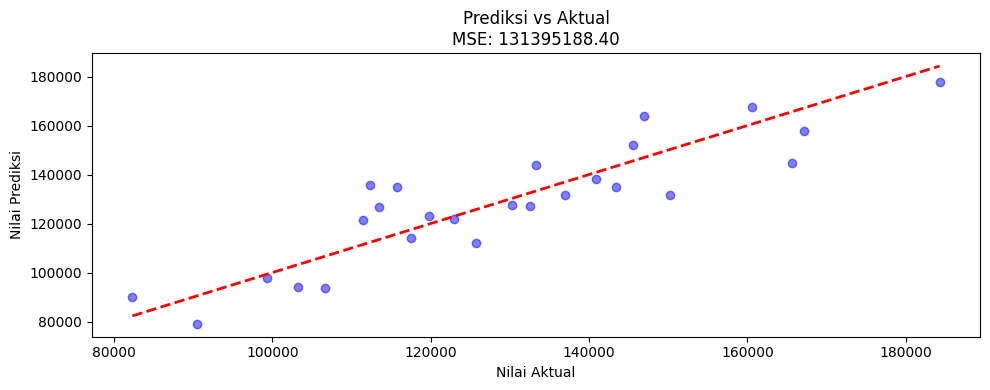

In [32]:
mse = mean_squared_error(y_test, y_pred)

    # Buat plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title(f'Prediksi vs Aktual\nMSE: {mse:.2f}')

plt.tight_layout()
plt.show()

**MODEL NEURAL NETWORK**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [24]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam',loss='mse')

In [26]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 18149859328.0000 - val_loss: 17275064320.0000
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 17782011904.0000 - val_loss: 17275025408.0000
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 17518792704.0000 - val_loss: 17274986496.0000
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 17960648704.0000 - val_loss: 17274949632.0000
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 17560276992.0000 - val_loss: 17274910720.0000
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 17967581184.0000 - val_loss: 17274871808.0000
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17937375232.0000 - val_loss: 17274832896.0000
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17806569472.0000 - val_loss: 17274787840.0000
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17429426176.0000 - val_loss: 17274742784.0000
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1766

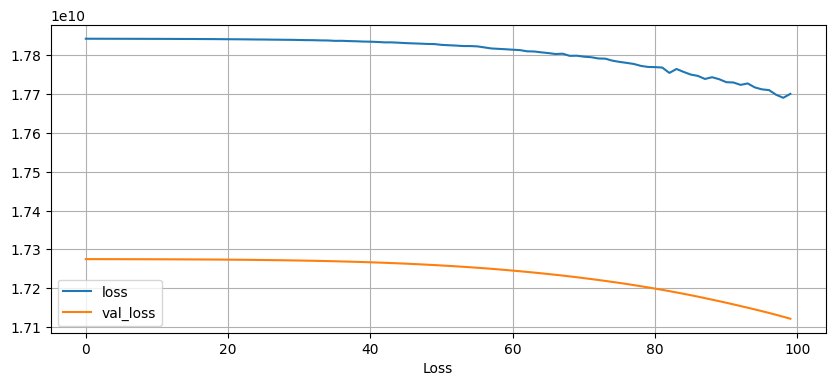

In [28]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.grid()
plt.show()